In [75]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR
from classifiers import trainMultiLayer, runMultiLayer

plt.rcParams['figure.facecolor']='white'

In [76]:
# This script will help you test your single layer neural network code
# Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 3; # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

In [77]:
# Select a subset of the training samples
numBins = 5                        # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = np.inf  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True              # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins, numSamplesPerLabelPerBin = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Add your own code to setup data for training and test here
XTrain = np.concatenate(XBins[0:4])
DTrain = np.concatenate(DBins[0:4])
LTrain = np.concatenate(LBins[0:4])
XTest  = XBins[4]
DTest  = DBins[4]
LTest  = LBins[4]

In [78]:
# Modify the X Matrices so that a bias is added
# Note that the bias must be the last feature for the plot code to work

# The training data
biasColumn = np.ones((XTrain.shape[0],1))
XTrain = np.append(XTrain, biasColumn, axis=1)

# The test data
biasColumnTest = np.ones((XTest.shape[0],1))
XTest = np.append(XTest, biasColumnTest, axis=1)

In [79]:
# Train your multi layer network
# Note: You need to modify trainMultiLayer() and runMultiLayer() in classifiers.py in order to train the network

# Working spec for the different sets (numHidden, numIterations, learningRate)
# Specs for data set 1:
# Specs for data set 2:
# Specs for data set 3:
# Specs for data set 4:

numHidden = 16          # Change this, number of hidden neurons
numIterations = 10000  # Change this, number of iterations (epochs)
learningRate  = 0.1  # Change this, your learning rate
classes = np.unique(LTrain)
NClasses = classes.shape[0]
W0 = np.random.randn(XTrain.shape[1], numHidden)   # Initialize your weight matrix W (hidden)
V0 = np.random.randn(numHidden+1, NClasses)          # Initialize your weight matrix V (output)

# Run training loop
W, V, ErrTrain, ErrTest = trainMultiLayer(XTrain, DTrain, XTest, DTest ,W0, V0, numIterations, learningRate)

(1596, 17)
n : 0
n : 1000
n : 2000
n : 3000
n : 4000
n : 5000
n : 6000
n : 7000
n : 8000
n : 9000


Text(0, 0.5, 'Error')

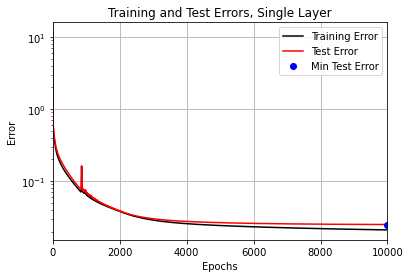

In [80]:
# Plot errors
# Note: You should not have to modify this code

# [minErrTest, minErrTestInd] = min(ErrTest);
minErrTest = ErrTest.min()
minErrTestInd = ErrTest.argmin()

plt.figure()

plt.semilogy(ErrTrain, 'k', linewidth=1.5, label='Training Error')
plt.semilogy(ErrTest, 'r', linewidth=1.5, label='Test Error')
plt.semilogy(minErrTestInd, minErrTest, 'bo', linewidth=1.5, label='Min Test Error')

plt.xlim([0,numIterations])
plt.grid('on')
plt.title('Training and Test Errors, Single Layer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')

In [81]:
# Calculate the Confusion Matrix and the Accuracy of the data
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

_, LPredTrain, _ = runMultiLayer(XTrain, W, V)
_, LPredTest , _ = runMultiLayer(XTest , W, V)

# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[132.   1.   0.]
 [  1. 132.   0.]
 [  0.   0. 133.]]
Accuracy: 0.9950


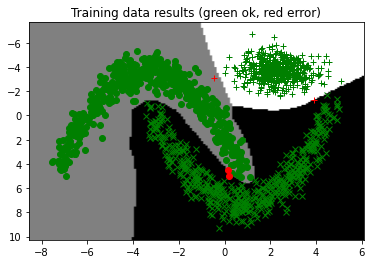

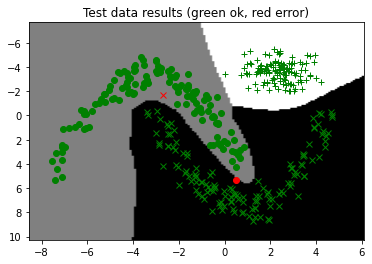

In [82]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, LPredTrain, XTest, LTest, LPredTest, 'multi', [W, V], [])
else:
    plotResultsOCR(XTest, LTest, LPredTest)